In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv("/content/EEG data - Sheet1.csv")

In [ ]:
df = df.drop(columns=['Unnamed: 0'])
df

,alpha1,alpha2,alpha3,alpha4,alpha5,alpha6,alpha7,alpha8,alpha9,alpha10,...,gamma56,gamma57,gamma58,gamma59,gamma60,gamma61,gamma62,gamma63,gamma64,target
0,284.849874,142.644639,121.959358,20.689941,162.718859,96.712580,32.107585,109.816990,82.554413,147.220176,...,728.620372,357.317390,418.459495,803.357489,622.743387,407.283894,1039.213087,814.602268,495.681338,1
1,233.226345,206.517299,176.217193,142.113615,236.910116,214.179673,122.244364,224.277579,206.748386,250.616929,...,47.706396,22.760991,61.017669,42.583440,32.913916,105.082693,127.043945,149.076038,143.302551,1
2,399.259569,422.363340,406.151660,99.736116,532.974104,399.405680,128.695200,440.958308,210.810962,383.109241,...,52.067200,33.067416,53.119327,40.865276,35.342310,294.777573,606.454735,231.034750,103.109478,1
3,838.752489,365.625881,318.992672,88.560230,544.835506,347.261656,121.668737,477.065877,379.691139,651.205159,...,35.284169,27.243271,48.598166,42.098596,34.789934,152.930283,651.219426,163.767926,110.319292,1
4,1282.646997,890.329519,783.534246,292.672272,1250.784307,986.049484,446.149832,1310.041361,1054.326805,1391.051639,...,192.121056,24.736841,217.990994,15.108556,15.609225,74.499232,160.088545,271.600819,107.385538,1
5,1374.213557,1065.910770,943.264212,574.650745,1331.560209,1182.849117,415.483346,1244.366731,898.445386,1267.394558,...,118.610512,115.575771,141.488828,112.835311,105.965655,97.128313,104.954439,123.074266,104.973957,1
6,115.231656,82.468116,83.501765,23.205842,101.730416,77.767258,24.863375,93.582667,62.199115,101.451786,...,89.157922,89.399001,36.485148,101.957272,25.581187,33.827397,42.053716,37.358180,28.280984,1
7,2752.527524,2235.034836,1732.950981,208.808469,2578.626816,2633.366534,281.600760,2792.257633,1978.782186,2983.236612,...,142.320182,103.213543,236.698267,71.326443,176.457416,308.175750,1390.523133,829.508324,198.646477,1
8,143.128834,32.741999,28.039296,5.826796,146.137210,89.270510,15.985101,144.549752,63.291773,132.298918,...,27.513104,14.509219,96.610267,12.778397,15.298345,48.464757,89.303842,104.925862,61.337218,1
9,287.354599,149.237162,118.940901,79.409749,185.387643,118.480773,92.255755,182.210160,170.551773,265.618884,...,30.643089,19.767171,68.423287,44.303767,38.477199,77.385344,154.306296,168.138587,86.847620,1


In [ ]:
# Separate features and target
X = df
y = df['target']

## Choose top 20 features which the model decides using ANOVA

In [ ]:
# For linear relationships (ANOVA F-value)
selector_linear = SelectKBest(score_func=f_classif, k=20)  # Top 20 features
X_linear = selector_linear.fit_transform(X, y)

# For non-linear relationships (mutual information)
selector_nonlinear = SelectKBest(score_func=mutual_info_classif, k=20)
X_nonlinear = selector_nonlinear.fit_transform(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [ ]:
selected_features_indices = selector_linear.get_support(indices=True)  # For ANOVA
selected_features_names = X.columns[selected_features_indices]  # If X is a DataFrame

## Name of the top 20 features selected

In [ ]:
selected_features_names

Index(['alpha23', 'beta15', 'beta23', 'beta44', 'delta11', 'delta17',
       'delta18', 'delta19', 'delta23', 'delta40', 'delta41', 'delta43',
       'delta51', 'delta62', 'delta64', 'theta11', 'theta17', 'theta23',
       'theta62', 'target'],
      dtype='object')

## Storing the top 20 features in X_linear and printing the shape of the variables containing the number of rows and columns

In [ ]:
X_linear = df[selected_features_names]
y = df['target']

# Verify shapes
print(f"X shape: {X_linear.shape}, y shape: {y.shape}")

X shape: (40, 20), y shape: (40,)


## Splitting the dataset to train the model. The training and testing size ratio is 50/50. The data is standardized as well for better prediction

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_linear,  # or X_nonlinear
    y,
    test_size=0.5,
    random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Simple Logistic Regression Model used and as this is a classification problem, f1 score is more important

In [ ]:
# Initialize and train the model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr.predict(X_test_scaled)

# Metrics
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)

# Print all metrics
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"Logistic Regression Precision: {lr_precision:.4f}")
print(f"Logistic Regression F1 Score: {lr_f1:.4f}")

Logistic Regression Accuracy: 0.9000
Logistic Regression Precision: 0.8462
Logistic Regression F1 Score: 0.9167


Accuracy: 0.9000
Precision: 0.8462
F1 Score: 0.9167


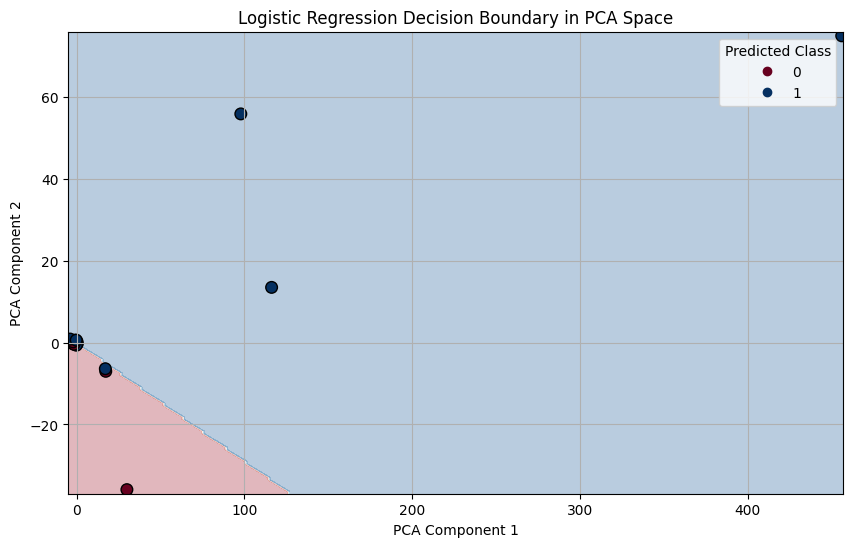

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Step 1: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train model on full features
lr_full = LogisticRegression(max_iter=1000)
lr_full.fit(X_train_scaled, y_train)

# Step 3: Predict on test data
y_pred_lr = lr_full.predict(X_test_scaled)

# Step 4: Evaluate performance
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr):.4f}")

# Step 5: PCA for 2D visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 6: Train a new LR on PCA-reduced data (only for boundary plotting)
lr_pca = LogisticRegression()
lr_pca.fit(X_train_pca, y_train)

# Step 7: Create mesh grid for decision boundary
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = lr_pca.predict(grid_points)
Z = Z.reshape(xx.shape)

# Step 8: Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1],
                      c=y_pred_lr, cmap=plt.cm.RdBu, edgecolor='k', s=70)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Logistic Regression Decision Boundary in PCA Space")
plt.legend(*scatter.legend_elements(), title="Predicted Class")
plt.grid(True)
plt.show()

## Hyperparameter tuning for Logisitic Regression to see the parameters giving the best cross-validation score

In [ ]:
# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],               # Regularization type
    'solver': ['liblinear', 'saga']        # Solvers that support L1/L2
}

# Initialize GridSearchCV
grid = GridSearchCV(
    LogisticRegression(max_iter=1000),  # Increase max_iter for convergence
    param_grid,
    cv=5,                              # 5-fold cross-validation
    scoring='f1',                      # Metric to optimize
    n_jobs=-1                          # Use all CPU cores
)

# Fit on scaled data (if using regularization)
grid.fit(X_train_scaled, y_train)

# Results
print("Best parameters:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)

Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 1.0


## Choosing the parameters given by hyperparameter tuning

In [ ]:
# Initialize and train
lr = LogisticRegression(max_iter=1000, C=1, penalty='l1', solver='liblinear')
lr.fit(X_train_scaled, y_train)

# Evaluate
y_pred_lr = lr.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Precision:", precision_score(y_test, y_pred_lr))
print("Logistic Regression F1 Score:", f1_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 1.0
Logistic Regression Precision: 1.0
Logistic Regression F1 Score: 1.0


## All 4 types of SVM tried - Linear, RBF, Polynomial and Sigmoid

SVM with linear kernel:
  Accuracy : 1.0000
  Precision: 1.0000
  F1 Score : 1.0000



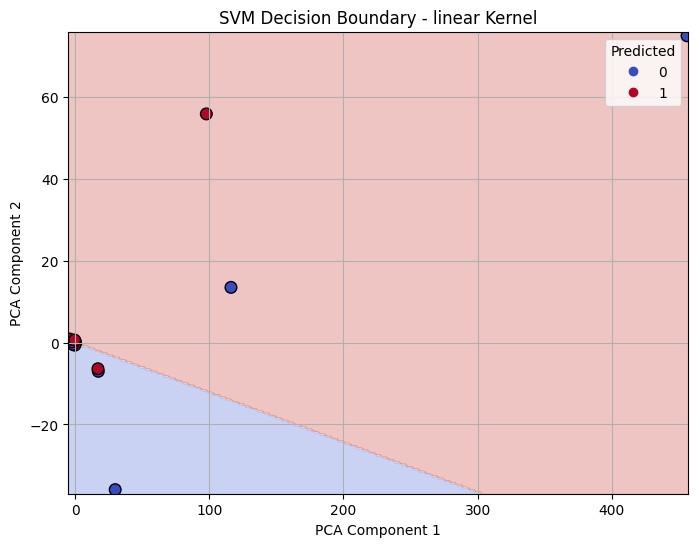

SVM with rbf kernel:
  Accuracy : 0.6000
  Precision: 0.6000
  F1 Score : 0.5736



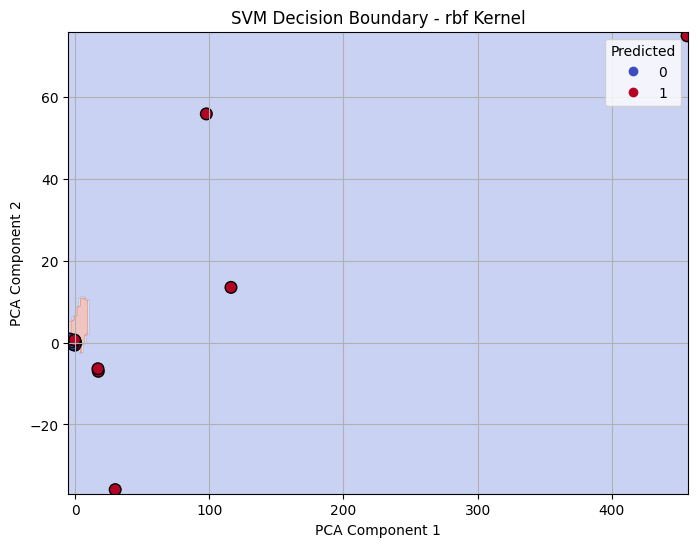

SVM with poly kernel:
  Accuracy : 0.4500
  Precision: 0.4750
  F1 Score : 0.3513



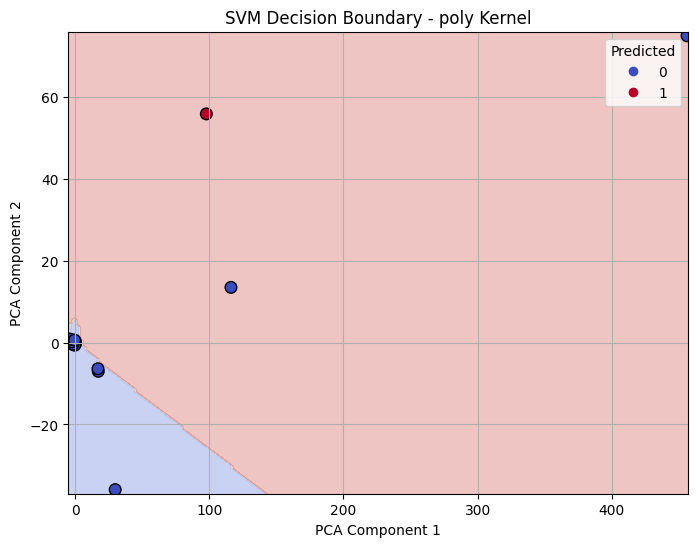

SVM with sigmoid kernel:
  Accuracy : 0.8500
  Precision: 0.8821
  F1 Score : 0.8440



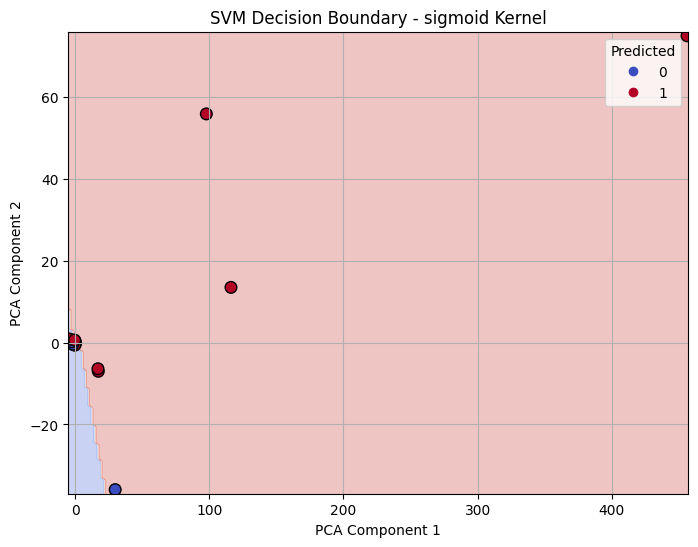

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# First, perform PCA for 2D projection
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Function to evaluate and visualize SVM
def evaluate_and_plot_svm(kernel_type):
    # Train on original data for metrics
    svm_model = SVC(kernel=kernel_type)
    svm_model.fit(X_train_scaled, y_train)
    y_pred = svm_model.predict(X_test_scaled)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"SVM with {kernel_type} kernel:")
    print(f"  Accuracy : {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  F1 Score : {f1:.4f}\n")

    # Train again on PCA-reduced for visualization
    svm_vis = SVC(kernel=kernel_type)
    svm_vis.fit(X_train_pca, y_train)

    # Grid for decision boundary
    x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
    y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1],
                          c=y_pred, cmap=plt.cm.coolwarm, edgecolor='k', s=70)
    plt.title(f"SVM Decision Boundary - {kernel_type} Kernel")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend(*scatter.legend_elements(), title="Predicted")
    plt.grid(True)
    plt.show()

    return accuracy, precision, f1

# Evaluate and plot for each kernel
results = {}
for kernel in ['linear', 'rbf', 'poly', 'sigmoid']:
    results[kernel] = evaluate_and_plot_svm(kernel)


# KNN

## Plot made for seeing the best k value

In [ ]:
k_range = range(1, min(16, len(X_train_scaled)) + 1)  # Ensure k <= training samples
k_scores = []

## Cross Validation is also done for each k value and the mean value is shown in the plot below

In [ ]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')  # 5-fold CV
    k_scores.append(scores.mean())

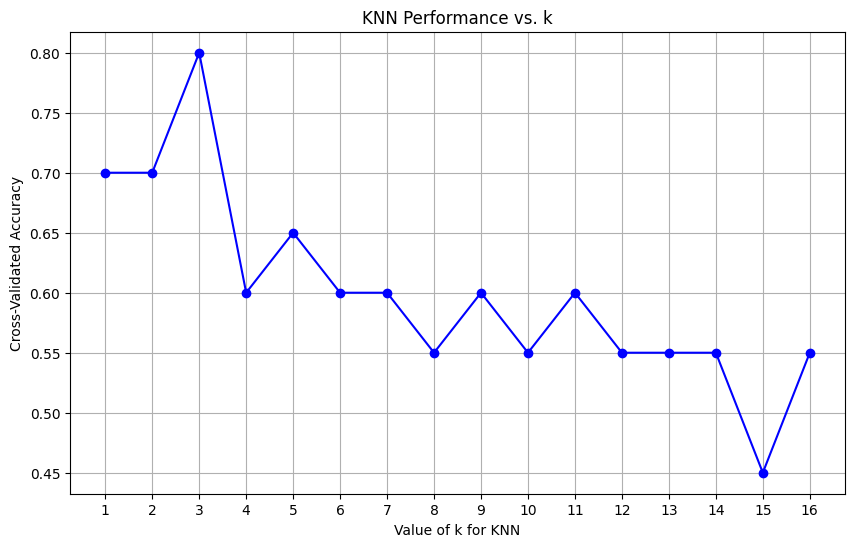

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Performance vs. k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

## As k=3 gives the best performance in the above plot, it is chosen as the n_neighbors value

In [ ]:
# Initialize and train KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test_scaled)

# Calculate metrics
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn, average='weighted')
knn_f1 = f1_score(y_test, y_pred_knn, average='weighted')

# Print formatted results
print("K-Nearest Neighbors (KNN) Results:")
print(f"  Accuracy : {knn_accuracy:.4f}")
print(f"  Precision: {knn_precision:.4f}")
print(f"  F1 Score : {knn_f1:.4f}")

K-Nearest Neighbors (KNN) Results:
  Accuracy : 0.6500
  Precision: 0.8031
  F1 Score : 0.6173


## PCA tried for KNN

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X = original features

## Shape of dataset shown after PCA. From 321 columns, it now has 12 columns left

In [ ]:
# Apply PCA to retain 95% variance
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"Original shape: {X_scaled.shape}, Reduced shape after PCA: {X_pca.shape}")

Original shape: (40, 321), Reduced shape after PCA: (40, 12)


## PCA is not giving a good score somehow

In [ ]:
# Split the PCA-transformed data
X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.5, random_state=42
)

# Function to evaluate a model
def evaluate_model(model, model_name):
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"{model_name} Results:")
    print(f"  Accuracy : {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  F1 Score : {f1:.4f}")

# List of SVM kernels to evaluate
svm_kernels = ['linear', 'rbf', 'poly', 'sigmoid']

# Loop through each kernel type and evaluate the SVM model
for kernel in svm_kernels:
    svm_model = SVC(kernel=kernel, random_state=42)
    evaluate_model(svm_model, f"Support Vector Machine (SVM) - {kernel} Kernel")

# Train and evaluate KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
evaluate_model(knn_model, "K-Nearest Neighbors (KNN)")

Support Vector Machine (SVM) - linear Kernel Results:
  Accuracy : 0.3500
  Precision: 0.3440
  F1 Score : 0.3251
Support Vector Machine (SVM) - rbf Kernel Results:
  Accuracy : 0.3500
  Precision: 0.3563
  F1 Score : 0.3451
Support Vector Machine (SVM) - poly Kernel Results:
  Accuracy : 0.3500
  Precision: 0.1750
  F1 Score : 0.2333
Support Vector Machine (SVM) - sigmoid Kernel Results:
  Accuracy : 0.4500
  Precision: 0.4679
  F1 Score : 0.4289
K-Nearest Neighbors (KNN) Results:
  Accuracy : 0.3000
  Precision: 0.3061
  F1 Score : 0.3000


#Features



In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load your dataset (assume it's already a DataFrame called 'df')
# Example: df = pd.read_csv("your_dataset.csv")

# Separate features and target
X = df.drop(columns=["target"])
y = df["target"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Univariate Feature Selection (UFS)
ufs = SelectKBest(score_func=f_classif, k=5)
ufs.fit(X_train, y_train)
ufs_features = X.columns[ufs.get_support()].tolist()

# Recursive Feature Elimination (RFE)
rfe = RFE(LogisticRegression(max_iter=1000), n_features_to_select=5)
rfe.fit(X_train, y_train)
rfe_features = X.columns[rfe.support_].tolist()

# Principal Component Analysis (PCA)
pca = PCA(n_components=5)
pca.fit(X_train)
pca_components = pca.components_  # shape (5, num_features)

# Get original features with highest absolute weights for each PC
pca_top_features = []
for i in range(5):
    component_weights = abs(pca_components[i])
    top_feature_idx = component_weights.argsort()[-1]
    pca_top_features.append(X.columns[top_feature_idx])
pca_top_features = list(set(pca_top_features))  # unique list

# Print results
print("Top 5 Features from UFS:", ufs_features)
print("Top 5 Features from RFE:", rfe_features)
print("Top Features from PCA (based on PC1–5):", pca_top_features)


Top 5 Features from UFS: ['alpha10', 'alpha53', 'delta18', 'delta26', 'gamma30']
Top 5 Features from RFE: ['alpha6', 'beta10', 'delta11', 'delta60', 'gamma24']
Top Features from PCA (based on PC1–5): ['delta55', 'delta62', 'delta23', 'delta10', 'delta52']


visulization

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter

In [ ]:
# Define top features from all three methods
ufs = ['alpha10', 'alpha53', 'delta18', 'delta26', 'gamma30']
rfe = ['alpha6', 'beta10', 'delta11', 'delta60', 'gamma24']
pca = ['delta55', 'delta62', 'delta23', 'delta10', 'delta52']

# Mapping features to channels
feature_to_channel = {
    'alpha10': 10, 'alpha53': 53, 'delta18': 18, 'delta26': 26, 'gamma30': 30,
    'alpha6': 6, 'beta10': 10, 'delta11': 11, 'delta60': 60, 'gamma24': 24,
    'delta55': 55, 'delta62': 62, 'delta23': 23, 'delta10': 10, 'delta52': 52
}

In [ ]:
channel_counts = Counter(feature_to_channel[feat] for feat in (ufs + rfe + pca))


In [ ]:
#Create network graph
G = nx.Graph()
nodes = list(range(1, 65))  # 64 EEG channels

# Add nodes with frequency-based color and size
for node in nodes:
    G.add_node(node, size=300 + channel_counts.get(node, 0) * 500,
               color='red' if channel_counts.get(node, 0) == 3 else
                     'orange' if channel_counts.get(node, 0) == 2 else
                     'yellow' if channel_counts.get(node, 0) == 1 else 'lightgray')

In [ ]:
# Use a shell layout to simulate EEG-like structure
shells = [
    [33],  # center
    [16,17,18,19,20,21,22,23],  # next ring
    [8,9,10,11,12,13,14,15,24,25,26,27,28,29,30,31],  # third ring
    [1,2,3,4,5,6,7,32,34,35,36,37,38,39,40,41],  # fourth ring
    [42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57],  # outer ring
    [58,59,60,61,62,63,64]  # farthest
]
pos = nx.shell_layout(G, shells)

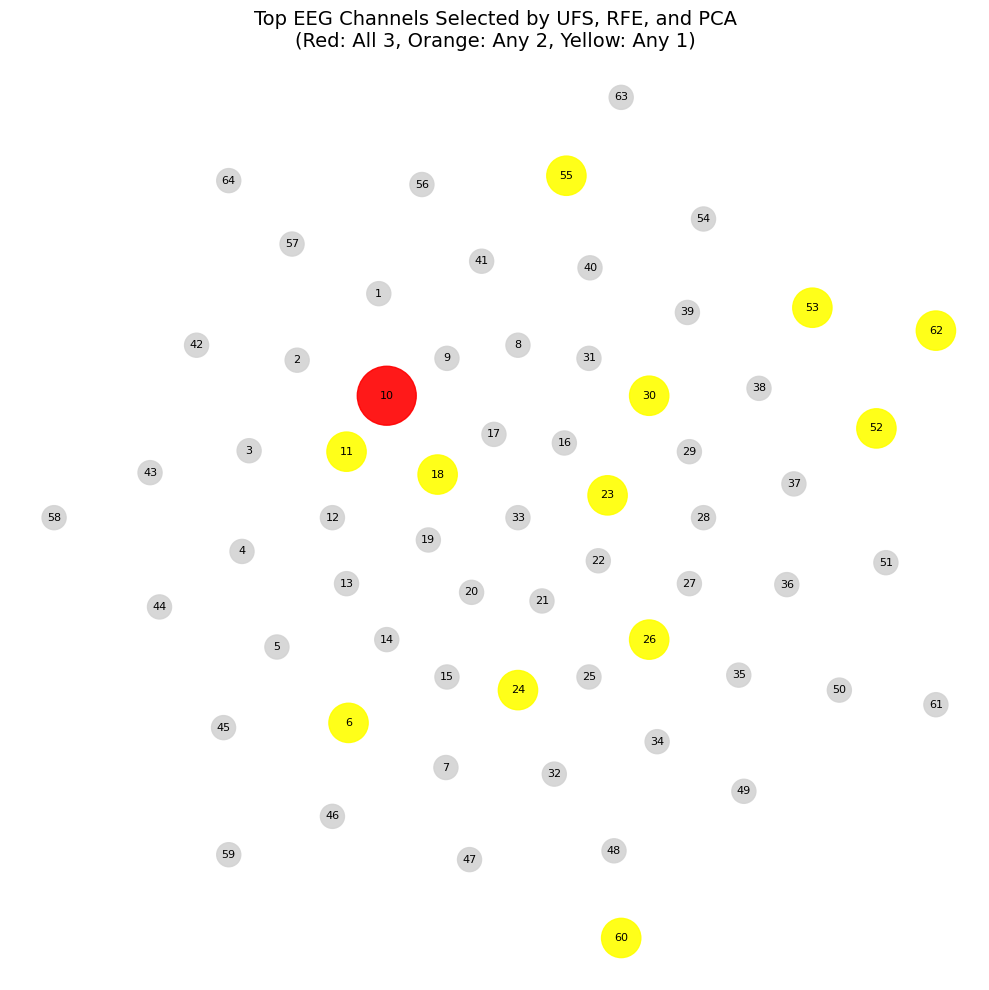

In [ ]:
# Draw the network
plt.figure(figsize=(10, 10))
node_colors = [G.nodes[n]['color'] for n in G.nodes]
node_sizes = [G.nodes[n]['size'] for n in G.nodes]

nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title("Top EEG Channels Selected by UFS, RFE, and PCA\n(Red: All 3, Orange: Any 2, Yellow: Any 1)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()